In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from scipy import stats

pd.set_option('display.width', 700)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

mpl.rcParams['xtick.labelsize'] = 12

sns.set_style("darkgrid")
sns.set_context("notebook")

In [2]:
#Load datasets
resp_table = pd.read_csv("test_dataset/Responded_Table.csv", index_col=0, parse_dates = True)
sent_table = pd.read_csv("test_dataset/Sent_Table.csv", index_col=0, parse_dates = True)
ub_df = pd.read_csv("test_dataset/UB.csv")

resp_table = resp_table.sort_index()
sent_table = sent_table.sort_index()

In [3]:
#Check for missing values for resp_table
resp_table.isnull().all(axis=0)

Customer_ID       False
SubjectLine_ID    False
dtype: bool

In [4]:
#Check for missing values for sent_table
sent_table.isnull().all(axis=0)

Customer_ID       False
SubjectLine_ID    False
dtype: bool

In [5]:
#Check for missing values for ub_df
ub_df.isnull().all(axis=0)

Customer_ID      False
Gender           False
Type             False
Email_Address    False
Age              False
Tenure           False
dtype: bool

In [6]:
sent_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2476354 entries, 2016-01-01 to 2016-03-27
Data columns (total 2 columns):
Customer_ID       int64
SubjectLine_ID    int64
dtypes: int64(2)
memory usage: 56.7 MB


In [10]:
sent_table.head()

,Customer_ID,SubjectLine_ID
Sent_Date,,
2016-01-01,332899,1
2016-01-01,279465,3
2016-01-01,21290,3
2016-01-01,424054,2
2016-01-01,331219,1


In [11]:
resp_table.head()

,Customer_ID,SubjectLine_ID
Responded_Date,,
2016-01-01,370483,3
2016-01-01,66655,2
2016-01-01,84601,3
2016-01-01,360300,3
2016-01-01,471976,3


In [12]:
ub_df.head()

,Customer_ID,Gender,Type,Email_Address,Age,Tenure
0,1,M,C,Mph@msn.com,38,12
1,2,F,B,SophcYN7381qMe8lRqK@aol.com,37,23
2,3,F,C,xE@msn.com,32,15
3,4,M,C,WduR0o0@comcast.net,31,24
4,5,M,C,walHI9cmWJIBKvy0@aol.com,35,13


### Q1: Provide the Average, Median, Q1, Q3, Min, Max and the Mode of Age variable

In [13]:
print("Average of Age variable is:--------- %.2f")%np.mean(ub_df['Age'].values) 
print("Median of Age variable is:---------- %.2f")%np.median(ub_df['Age'].values) 
print("1st quartile of Age variable is:---- %.2f")%np.percentile(ub_df['Age'].values, 25)
print("3rd quartile of Age variable is:---- %.2f")%np.percentile(ub_df['Age'].values, 75)
print("Min of Age variable is:------------- %.2f")%np.min(ub_df['Age'].values)
print("Max of Age variable is:------------- %.2f")%np.max(ub_df['Age'].values)
print("Mode of Age variable is:------------ %.2f")%stats.mode(ub_df['Age'].values)[0][0]

Average of Age variable is:--------- 31.62
Median of Age variable is:---------- 31.00
1st quartile of Age variable is:---- 27.00
3rd quartile of Age variable is:---- 36.00
Min of Age variable is:------------- 18.00
Max of Age variable is:------------- 63.00
Mode of Age variable is:------------ 31.00


In [14]:
#Q1: Other way to summarize statistics!
ub_df['Age'].describe()

count    500000.000000
mean         31.618982
std           6.707925
min          18.000000
25%          27.000000
50%          31.000000
75%          36.000000
max          63.000000
Name: Age, dtype: float64

### Q2:Provide a Histogram of the Tenure variable. What can you say about the distribution?

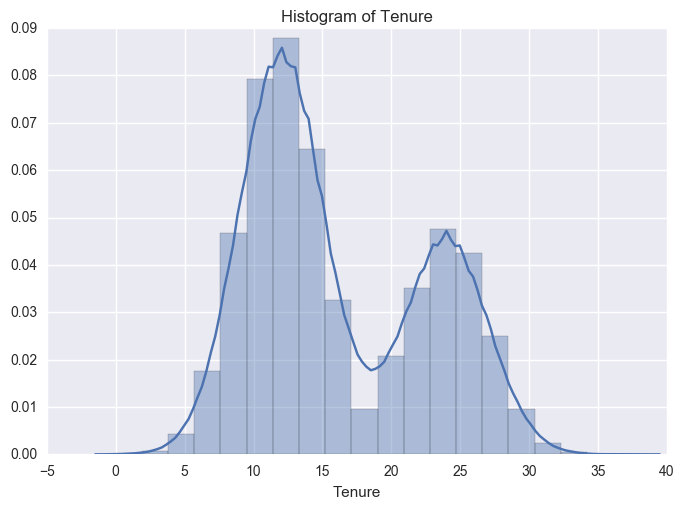

In [15]:
sns.distplot(ub_df.Tenure, kde=True, bins=20)
plt.title("Histogram of Tenure")
plt.show()

From above histogram we have a bimodal normal distribution with similar standard deviations.

### Q3:Provide a 95% Confidence Interval of the Tenure.

In [16]:
sample_size = 100000
np.random.seed(7)
sample = np.random.choice(ub_df.Tenure, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-score*         
pop_stdev = ub_df.Tenure.std()  # Get the sample standard deviation
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))# Get the margin of error

confidence_interval = (sample_mean - margin_of_error,sample_mean + margin_of_error) 
print("Confidence interval:({:.2f}, {:.2f})".format(confidence_interval[0], confidence_interval[1]))

Confidence interval:(16.11, 16.19)


From above interval limits we are 95% statistically confident that the true population mean is between the bounds and hence reject the claim that the average Tenure of the userbase is 17 months

### Q4: Calculate the Average Age and the Proportion of Customers per Gender and Type.

In [17]:
def data_range(series):
    return series.count()/series.sum()

grouped_table = ub_df.groupby(['Gender', 'Type']).agg({'Customer_ID': 'count', 'Age': 'mean'})
grouped_table['Cust_Prop'] = grouped_table.groupby(level=0)['Customer_ID'].transform(lambda x: x*100./x.sum())
grouped_table = grouped_table.rename(columns={'Age': 'Average_Age'})
grouped_table = grouped_table.drop('Customer_ID',axis=1)

In [18]:
grouped_table

Average_Age  Cust_Prop
Gender Type                        
F      B       37.969927  19.897810
       C       30.032257  80.102190
M      B       37.984278  19.960865
       C       30.036459  80.039135

### Q5: Calculate the Average Age and the Proportion of Customers per Gender and Type.

In [19]:
import re

ub_df = ub_df.assign(Email_Domain = ub_df['Email_Address'].apply(
        lambda s: re.search("@[\w.]+", s).group()[1:]))

In [20]:
#Counts of mail domains
ub_df['Email_Domain'].value_counts()

gmail.com      150266
hotmail.com    125482
msn.com         74626
yahoo.com       64831
aol.com         49975
comcast.net     34820
Name: Email_Domain, dtype: int64

### Q6: Calculate the Average Number of Subject Lines Sent per Weekday 

In [21]:
import calendar

In [22]:
sent_table['sent_Weekday'] = sent_table.index.weekday
sent_table['sent_Weekday'] = sent_table['sent_Weekday'].apply(lambda s: calendar.day_name[s])

In [23]:
sent_table_grouped = sent_table.groupby(['sent_Weekday', 'SubjectLine_ID'])['Customer_ID']
avg_num_Subj_day = sent_table_grouped.count().unstack(level=1).mean(axis=1).astype(int)
avg_num_Subj_day

sent_Weekday
Friday       123170
Monday       113841
Saturday     123310
Sunday       123428
Thursday     114280
Tuesday      113873
Wednesday    113546
dtype: int32

In [24]:
sent_table.drop("sent_Weekday", inplace=True, axis=1)

### Q7: Calculate the Average Open Rate by SubjectLine_ID considering as valid responses ONLY those Emails which were Opened at the Sent Date

In [25]:
# Group tables by Dates and SubjectlineIDs 
sent_mails_counts = sent_table.reset_index().groupby(['Sent_Date', 'SubjectLine_ID']).count()
resp_mails_counts = resp_table.reset_index().groupby(['Responded_Date', 'SubjectLine_ID']).count()

#Rename columns
sent_mails_counts.columns = ['Customer_ID_Sent']
resp_mails_counts.columns = ['Customer_ID_Resp']

In [26]:
#Concatenate dataframes vertically
open_rates = pd.concat([sent_mails_counts, resp_mails_counts], join='inner', axis=1)

In [27]:
open_rates['OR_perc'] = 100.0*open_rates['Customer_ID_Resp'] / open_rates['Customer_ID_Sent']
open_rates.head()

Customer_ID_Sent  Customer_ID_Resp    OR_perc
2016-01-01 1              9505               920   9.679116
           2              9374               884   9.430339
           3              9380               776   8.272921
2016-01-02 1              9435              1151  12.199258
           2              9418              1180  12.529199

In [29]:
#Get average open rates by SubjectLineID
avg_open_rates = open_rates.unstack(level=1)['OR_perc'].mean(axis=0)
avg_open_rates

1    15.739106
2    15.659964
3    13.992229
dtype: float64

**Conclusion:** Nr. 1&2 performance is similar whereas 3 has slightly poorer performance.

### Hypothesis testing (t-test) on the between groups 1,2 SubjectLineID

In [30]:
#Calculate point estimates for the hypothesis testing
#Null values are zero, which denote the mean differences are statistically similar
mean_diff = avg_open_rates.loc[1] - avg_open_rates.loc[2]
mean_diff

0.079141481985383066

In [31]:
#Calculate standard deviation on open rate for all messages 
std_open_rates = open_rates.unstack(level=1)['OR_perc'].std(axis=0)
std_open_rates

1    0.873551
2    0.869928
3    0.816663
dtype: float64

In [32]:
#Get sample sizes on both groups
n_s = open_rates.unstack(level=1)['OR_perc'].shape[0]
#Calculate standard error
SE_diffs = np.sqrt(std_open_rates.loc[1]**2/n_s + std_open_rates.loc[2]**2/n_s)
#Calculate t-score for 95% confidence interval
t_score = stats.t.ppf(1-0.025, n_s-1)

In [33]:
#Confidence
conf1 = mean_diff - t_score*SE_diffs
conf2 = mean_diff + t_score*SE_diffs

In [34]:
print('Confidence interval for message is: (%.2f, %.2f)')%(conf1, conf2)

Confidence interval for message is: (-0.18, 0.34)


In [35]:
#p-value limits
p1 = stats.t.pdf((conf1 - mean_diff)/SE_diffs, n_s-1)
p2 = stats.t.pdf((conf1 + mean_diff)/SE_diffs, n_s-1)
print('p-value interval : (%.3f, %.3f)')%(p1, p2)

p-value interval : (0.056, 0.290)


**Conclusion:** From above confidence interval we observe the null value (0.0) is included and both p-values are greater than the Significance Level of 0.05. Therefore we fail to regect the null hypothesis and we conclude the means can be considered statistically equal. 

### Q8: Calculate the Average Open Rate by Type considering as valid responses ONLY those Subject Lines which were Opened at the Sent Date 

In [36]:
joined_ub_sent = pd.merge(ub_df, sent_table.reset_index(), 
                            on='Customer_ID', 
                            how='inner')
merged_ub_sent = pd.merge(joined_ub_sent, 
                          resp_table.reset_index(), 
                          on=['Customer_ID', 'SubjectLine_ID'], 
                          how='inner')

#Filter all rows which Responded_Date=Sent_Date
merged_ub_sent_valid = merged_ub_sent[merged_ub_sent.Responded_Date == merged_ub_sent.Sent_Date]
merged_ub_sent_valid.head()

,Customer_ID,Gender,Type,Email_Address,Age,Tenure,Email_Domain,Sent_Date,SubjectLine_ID,Responded_Date
1,1,M,C,Mph@msn.com,38,12,msn.com,2016-01-24,2,2016-01-24
3,1,M,C,Mph@msn.com,38,12,msn.com,2016-02-28,1,2016-02-28
8,5,M,C,walHI9cmWJIBKvy0@aol.com,35,13,aol.com,2016-01-26,3,2016-01-26
12,6,F,B,OoececBAnkd@yahoo.com,38,23,yahoo.com,2016-01-11,3,2016-01-11
22,9,F,C,KMBMKcI60@gmail.com,33,8,gmail.com,2016-03-06,3,2016-03-06


In [37]:
open_rates_type = merged_ub_sent_valid.groupby(['Responded_Date', 'Type'])['Type'].count().unstack(level=1)
open_rates_type.head()

Type,B,C
Responded_Date,,
2016-01-01,605,1975
2016-01-02,578,2029
2016-01-03,602,2002
2016-01-04,551,2098
2016-01-05,590,2045


In [38]:
open_rates_type['OR_perc_B'] = 100.0*open_rates_type.loc[:, 'B'] / open_rates_type.sum(axis=1)
open_rates_type['OR_perc_C'] = 100.0*open_rates_type.loc[:, 'C'] / open_rates_type.sum(axis=1)
avg_open_rates_type = open_rates_type[['OR_perc_B', 'OR_perc_C']].mean(axis=0)
avg_open_rates_type.head()

Type
OR_perc_B    21.927486
OR_perc_C    77.427798
dtype: float64

### Q9: Try to build a model which can predict the Open Rate based on the Customer’s attributes and the SubjetLine_ID received. 

In [39]:
#Prepare dataframe for the prediction model
model_df = pd.merge(merged_ub_sent_valid, 
                    open_rates[['OR_perc']].reset_index(), 
                    how='inner',
                    left_on=['Responded_Date', 'SubjectLine_ID'], 
                    right_on = ['level_0', 'level_1'])

model_df = model_df.drop(['Customer_ID', 
                          'Email_Address', 
                          'Sent_Date', 
                          'Responded_Date', 
                          'level_0', 
                          'level_1'], axis=1)

In [40]:
#View final dataframe
model_df.head()

,Gender,Type,Age,Tenure,Email_Domain,SubjectLine_ID,OR_perc
0,M,C,38,12,msn.com,2,15.529064
1,M,C,30,12,hotmail.com,2,15.529064
2,F,C,26,13,gmail.com,2,15.529064
3,M,C,33,16,gmail.com,2,15.529064
4,M,C,29,14,gmail.com,2,15.529064


Regression problem with OR_perc as the label values

In [41]:
#Check value types
model_df.dtypes

Gender             object
Type               object
Age                 int64
Tenure              int64
Email_Domain       object
SubjectLine_ID      int64
OR_perc           float64
dtype: object

In [42]:
#Convert to categorical types
model_df['Gender'] = model_df['Gender'].astype('category')
model_df['Type'] = model_df['Type'].astype('category')
model_df['Email_Domain'] = model_df['Email_Domain'].astype('category')

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

from sklearn.metrics import mean_squared_error

In [44]:
# Spot-Check Algorithms (LINEAR)
models = []
models.append(('RIDGE', Ridge()))
models.append(('LASSO', Lasso()))

In [45]:
# Prepare dataset-encoding vaiables
model_df_cat = model_df.select_dtypes(include=['category'])
le = LabelEncoder()
model_df_in = pd.concat([model_df[['Age', 'Tenure', 'SubjectLine_ID', 'OR_perc']], 
           model_df_cat.apply(le.fit_transform)], axis=1)

X = model_df_in.drop('OR_perc', axis=1).values
Y = model_df_in['OR_perc'].values
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [46]:
# evaluate each model in turn from 10-fold cross-validation 
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    results.append(mean_squared_error(y_test, y_test_pred))
    print('MSE train (%s): %.3f, test: %.3f' % (name,
                                                mean_squared_error(y_train, y_train_pred), 
                                                mean_squared_error(y_test, y_test_pred)))

MSE train (RIDGE): 0.859, test: 0.843
MSE train (LASSO): 1.337, test: 1.320


Training error is close to test error, so no sign of overfitting with linear models!

### Classification

In [47]:
#SubjectLine_ID as the target label of the dataset
#Check dataset for imbalace
model_df.SubjectLine_ID.value_counts()

1    79677
2    78967
3    70466
Name: SubjectLine_ID, dtype: int64

Between the three classes the dataset is well balanced. No need for calibration.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

In [49]:
# Spot-Check Algorithms-Classification
models = []
models.append(('LR', LogisticRegression(C=1000, penalty='l2')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))

In [46]:
# Prepare dataset-encoding vaiables
model_df_cat = model_df.select_dtypes(include=['category'])
le = LabelEncoder()
model_df_in = pd.concat([model_df[['Age', 'Tenure', 'SubjectLine_ID', 'OR_perc']], 
           model_df_cat.apply(le.fit_transform)], axis=1)

X = model_df_in.drop('SubjectLine_ID', axis=1).values
Y = model_df_in['SubjectLine_ID'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [47]:
# evaluate each model in turn from 10-fold cross-validation 
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    results.append(mean_squared_error(y_test, y_test_pred))
    print('Log-loss train (%s): %.3f, test: %.3f' % (name,
                                                     log_loss(y_train, model.predict_proba(X_train)), 
                                                     log_loss(y_test, model.predict_proba(X_test))))

Log-loss train (LR): 0.720, test: 0.717
Log-loss train (LDA): 0.751, test: 0.749
Log-loss train (NB): 0.758, test: 0.754


**Logistic Regression will be used for final training**

In [116]:
model_df_cat = model_df.select_dtypes(include=['category'])
le = LabelEncoder()
model_df_in = pd.concat([model_df[['Age', 'Tenure', 'SubjectLine_ID', 'OR_perc']],
                              model_df_cat.apply(le.fit_transform)], axis=1)

X_lm = model_df_in.drop('OR_perc', axis=1).values 
y_lm = model_df_in['OR_perc'].values

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_lm, y_lm)
pred_obs = np.array([50, 12, 3, 0, 0, 0]).reshape(1, -1)
open_rate_pred = lm.predict(pred_obs)
open_rate_inp = open_rate_pred[0]
print("Open rate predicted value from LM to used in the later LR model: %.3f")%open_rate_inp

Open rate predicted value from LM to used in the later LR model: 14.292


In [117]:
#Choose logistic regression to train on entire dataset
lr = models[0][1]
X = model_df_in.drop('SubjectLine_ID', axis=1).values
Y = model_df_in['SubjectLine_ID'].values

lr.fit(X, Y)

dp_eval = lr.predict_proba(np.array([50, 12, open_rate_inp, 0, 0, 0]).reshape(1, -1))
print('Estimated probability of customer to open the SubjectLine_ID=3 is %.3f')%(dp_eval[0][2])

Estimated probability of customer to open the SubjectLine_ID=3 is 0.706


### Q10: Represent graphically the Open Rate by taking into consideration the Age, Type and Gender

In [175]:
model_df.head()

,Gender,Type,Age,Tenure,Email_Domain,SubjectLine_ID,OR_perc
0,M,C,38,12,msn.com,2,15.529064
1,M,C,30,12,hotmail.com,2,15.529064
2,F,C,26,13,gmail.com,2,15.529064
3,M,C,33,16,gmail.com,2,15.529064
4,M,C,29,14,gmail.com,2,15.529064


In [ ]:
g = sns.lmplot(x="Age", y="OR_perc", col="Type", row='Gender',
               data=model_df, 
               aspect=.9, 
               x_jitter=1.2, 
               fit_reg = False, 
               scatter_kws={'alpha':0.1}, 
               size=6)

plt.show()

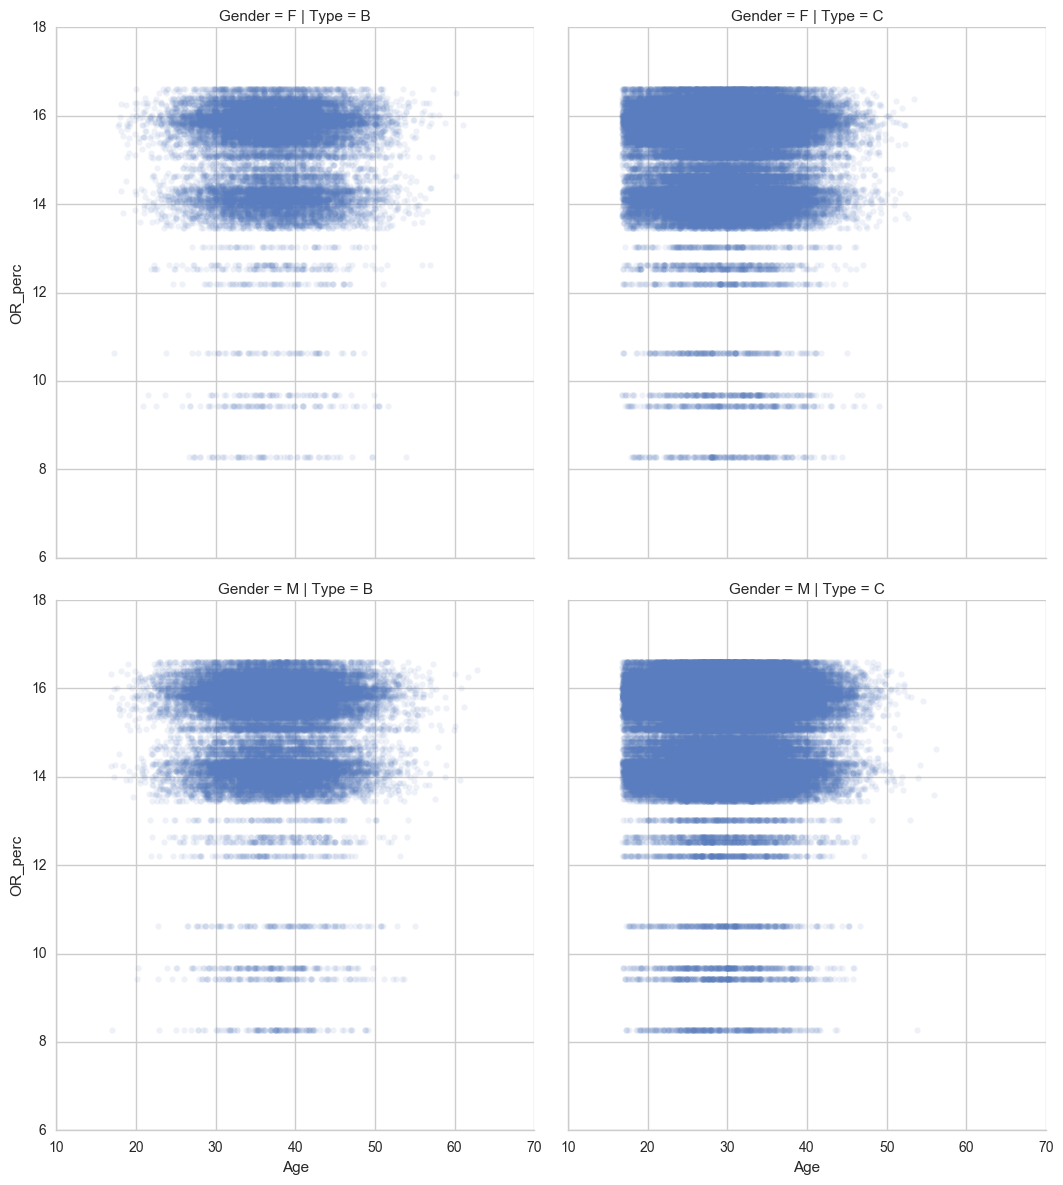

In [160]:
sns.set_context("notebook", font_scale=1)

g = sns.lmplot(x="Age", y="OR_perc", col="Type", row='Gender',
               data=model_df, 
               aspect=.9, 
               x_jitter=1.2, 
               fit_reg = False, 
               scatter_kws={'alpha':0.1}, 
               size=6)
sns.
plt.show()

### Categorical boxplots to check outliers 

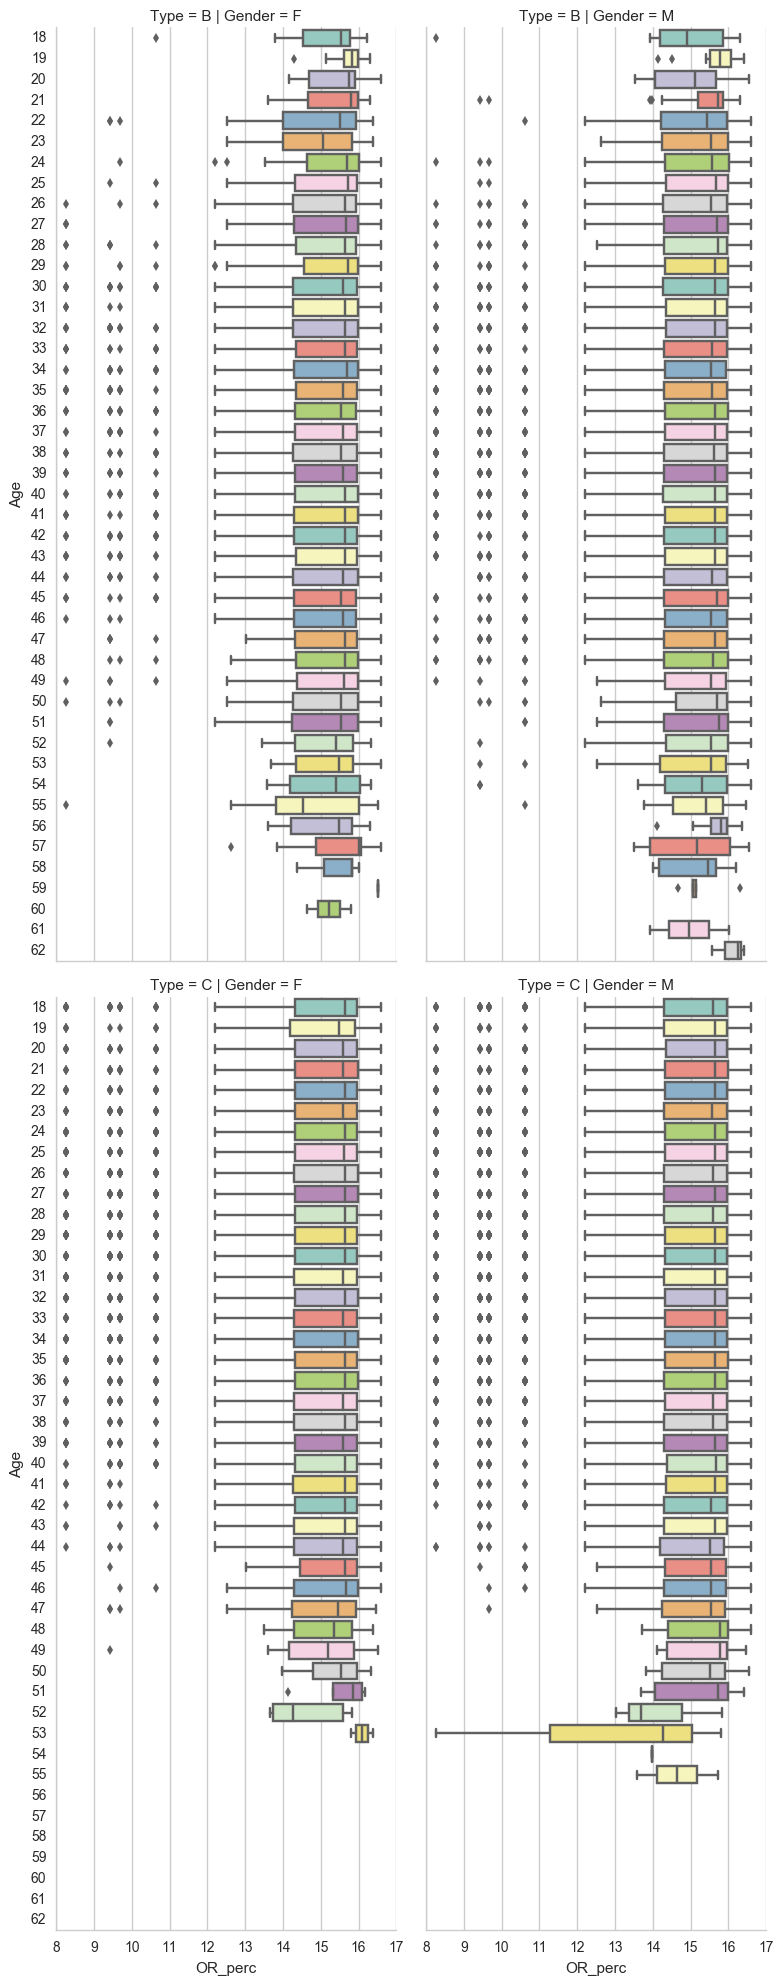

In [192]:
g = sns.factorplot(x="OR_perc", 
                   y="Age",
                   col="Gender", 
                   row="Type",
                   data=model_df,
                   orient="h", 
                   size=10, 
                   aspect=0.4, 
                   palette="Set3", 
                   kind="box", 
                   sharex=True)
plt.show()